In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class ElmanNeuralNetwork:
    def __init__(self, dataset_size, total_sequence_number, train_sequence, alpha_f, alpha_x, method, iteration_max = 1000):
        self.total_sequence_index = total_sequence_number
        self.alpha_f = alpha_f
        self.alpha_x = alpha_x
        self.method = method
        self.iteration_max = iteration_max
        
        self.data_x = np.random.randint(2, size=(dataset_size,total_sequence_number))
        self.train_data = self.data_x[:train_sequence]
        self.output_train_data = self.generate_train_output()
        self.test_data = self.data_x[dataset_size - train_sequence :]
        
        self.v_neurons = np.random.rand(2,1)
        
        self.predicted_value = np.zeros([np.size(self.train_data,0),1])
        
        self.error_log = []
     
    def generate_train_output(self):
        output = np.zeros([np.size(self.train_data,0),1])
        for i in range(np.size(self.train_data,0)):
            output[i,:] = np.sum(self.train_data[i,:])
        return output
    
    
    def froward_propagation(self, x_value, f_value):
        return (self.v_neurons[0] * f_value) + (self.v_neurons[1] * x_value) 
    
    def back_propagation(self):
        v_f_delta = 0
        v_x_delta = 0
        for t in range(self.total_sequence_index):
            # TODO fix index error 
            v_f_delta += (np.sum(self.delta() * self.predicted_value[t])) * (self.v_neurons[0,:] ** (self.total_sequence_index - t)) 
            v_x_delta += (np.sum(self.delta() * self.train_data[t])) * (self.v_neurons[0,:] ** (self.total_sequence_index - t)) 
        
        self.v_neurons[0,:] -=  self.alpha_f * v_f_delta
        self.v_neurons[1,:] -=  self.alpha_x * v_x_delta
        
    def resilient_propagation(self):
        return 
    
    def delta(self):
       return self.predicted_value - self.output_train_data
    
    def error(self):
        squares = self.delta() ** 2
        return np.sum(squares) / 2 
    
    def train_model(self):
        for iter in range(self.iteration_max):
            self.predicted_value = np.zeros([np.size(self.train_data,0),1])
            for i in range(np.size(self.train_data,0)):
                f_value = 0
                for j in range(np.size(self.train_data,1)):
                    f_value = self.froward_propagation(self.train_data[i,j],f_value)[0]
                
                self.predicted_value[i,:] = f_value
                
            self.error_log.append(self.error())
            
            if self.method == "BP":
                self.back_propagation()
            
            if self.method == "RP":
                self.resilient_propagation()
                
    def test_model(self):
        for i in range(np.size(self.train_data,0)):
                f_value = 0
                for j in range(np.size(self.train_data,1)):
                    f_value = self.froward_propagation(self.train_data[i,j],f_value)
                self.predicted_value.append(f_value)
        
    def show_error_log(self):
        plt.plot(self.error_log)
        plt.ylabel("Error")
        plt.xlabel("Itteration")
        plt.show()
    
        

/Users/victorsmits/.conda/envs/Jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: overflow encountered in multiply
/Users/victorsmits/.conda/envs/Jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in multiply


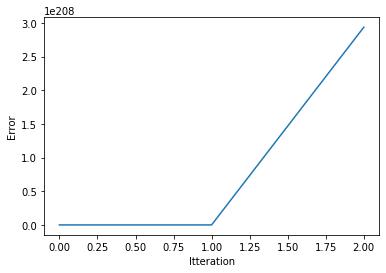

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [6]:
elman = ElmanNeuralNetwork(dataset_size = 40, total_sequence_number = 8, train_sequence = 30,
                           alpha_f=1e-2, alpha_x=1e-2, method = "BP", iteration_max = 100 )

elman.train_model()

elman.show_error_log()

print(elman.predicted_value)